# Analysis of NASA Asteroid data

## Overview
This [dataset](https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification/data) comes from NASA’s NeoWs (Near Earth Object Web Service), a RESTful web service that details asteroid information near Earth. I'm going to be using this data to understand:
1. what features are most correlated with an asteroid being classified as hazardous or not.
2. finding the best classification model to accurately predict whether an asteroid as hazardous or non-hazardous.

## Business Problem
This analysis would be great for NASA and the aerospace and space exploration industry to use for planetary defense and risk management.
- Resource Allocation: Space organizations often have limited resources for monitoring and researching asteroids. This model could help prioritize which asteroids need the most immediate attention or study, allowing organizations to allocate resources more efficiently.
- Partnerships and Funding: This project could also be used to pitch for funding or collaborations with other organizations who are interested in asteroid risk management. Governments and other organizations could also use this project as a tool to provide transparent data about asteroids for monitoring or emergency preparedness plans.
- Public awareness: This project could be used to educate the masses on asteroids and could become an open-source tool for people to do their own research with. 

## Data Understanding
This dataset contains 4687 rows and has 40 features to describe asteroids.

### Loading the datasets

In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway, ttest_ind
import helper

# to get the newest version of helper
import importlib
importlib.reload(helper)

<module 'helper' from '/Users/macbook/Documents/Flatiron/Cohort-Repos/assessments/phase3-project/nasa-asteroid-analysis/notebooks/helper.py'>

In [92]:
# loading in the data
nasa_df = pd.read_csv("../data/nasa.csv")

nasa_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [93]:
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [94]:
nasa_df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


Brief descriptions for each column:
- Neo Reference ID: Unique identifier for the near-Earth object.
- Name: Designated name of the near-Earth object.
- Absolute Magnitude: Measure of the object's intrinsic brightness.
- Est Dia in KM(min): Minimum estimated diameter in kilometers.
- Est Dia in KM(max): Maximum estimated diameter in kilometers.
- Est Dia in M(min): Minimum estimated diameter in meters.
- Est Dia in M(max): Maximum estimated diameter in meters.
- Est Dia in Miles(min): Minimum estimated diameter in miles.
- Est Dia in Miles(max): Maximum estimated diameter in miles.
- Est Dia in Feet(min): Minimum estimated diameter in feet.
- Est Dia in Feet(max): Maximum estimated diameter in feet.
- Close Approach Date: Date of the object's closest approach to Earth.
- Epoch Date Close Approach: Epoch timestamp of closest approach.
- Relative Velocity km per sec: Speed in km/sec during close approach.
- Relative Velocity km per hr: Speed in km/hr during close approach.
- Miles per hour: Speed in miles per hour during close approach.
- Miss Dist.(Astronomical): Miss distance in astronomical units.
- Miss Dist.(lunar): Miss distance in lunar distances.
- Miss Dist.(kilometers): Miss distance in kilometers.
- Miss Dist.(miles): Miss distance in miles.
- Orbiting Body: Celestial body the object orbits (usually the Sun).
- Orbit ID: Identifier for the orbit calculation.
- Orbit Determination Date: Date of the last orbit calculation.
- Orbit Uncertainty: Uncertainty level of the orbit path.
- Minimum Orbit Intersection: Minimum distance of orbit intersection.
- Jupiter Tisserand Invariant: Dynamic characteristic related to Jupiter.
- Epoch Osculation: Date of osculating orbital elements.
- Eccentricity: Measure of the orbit's deviation from circular.
- Semi Major Axis: Average radius of the orbit in AU.
- Inclination: Angle between orbit plane and reference plane.
- Asc Node Longitude: Longitude of the ascending node of orbit.
- Orbital Period: Time taken to complete one orbit.
- Perihelion Distance: Closest approach distance to the Sun.
- Perihelion Arg: Argument of perihelion in orbit.
- Aphelion Dist: Farthest distance from the Sun in orbit.
- Perihelion Time: Time of last perihelion passage.
- Mean Anomaly: Position of the object along its orbit.
- Mean Motion: Average orbital speed in degrees per day.
- Equinox: Reference equinox for orbital parameters.
- Hazardous: Indicates if the object is potentially hazardous.

### Data Cleaning & Feature Engineering

In [95]:
# check null values
nasa_df.isna().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

Wow, no null values! Perhaps NASA has its own data cleaning process before publishing data.

In [96]:
# let's do some feature engineering:
# create Est Dia in KM(avg) from the min and max

nasa_df["Est Dia in M(avg)"] = (nasa_df["Est Dia in M(min)"] + nasa_df["Est Dia in M(max)"]) / 2
nasa_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,Est Dia in M(avg)
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True,205.846088
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False,236.342931
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True,374.578302
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False,14.241070
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True,205.846088


In [97]:
# change the Hazardous column to 1 and 0 instead of True and False
nasa_df["Hazardous"] = nasa_df["Hazardous"].replace({True: 1, False: 0})
nasa_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,Est Dia in M(avg)
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1,205.846088
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0,236.342931
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1,374.578302
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0,14.241070
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1,205.846088


In [98]:
# Drop irrelevant columns for analysis
# Neo Reference ID, Name, Est Dia in M(min), Est Dia in M(max),
# Est Dia in Feet(min), Est Dia in Feet(max), Epoch Date Close Approach
# Relative Velocity km per sec, Miles per hour, Miss Dist.(Astronomical)
# Miss Dist.(lunar), Miss Dist.(miles), Orbiting Body, Orbit ID, Equinox
# Est Dia in KM(min), Est Dia in KM(max)

analysis_df = nasa_df.drop(columns=["Neo Reference ID" , "Name", "Est Dia in M(min)", "Est Dia in M(max)",
                                    "Est Dia in Feet(min)", "Est Dia in Feet(max)", "Epoch Date Close Approach",
                                    "Relative Velocity km per sec", "Miles per hour", "Miss Dist.(Astronomical)",
                                    "Miss Dist.(lunar)", "Miss Dist.(miles)", "Orbiting Body", "Orbit ID", "Equinox",
                                    "Est Dia in KM(min)", "Est Dia in KM(max)", "Est Dia in Miles(min)", "Est Dia in Miles(max)"])
analysis_df.head()

,Absolute Magnitude,Close Approach Date,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,Est Dia in M(avg)
0,21.6,1995-01-01,22017.003799,62753692.0,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1,205.846088
1,21.3,1995-01-01,65210.346095,57298148.0,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0,236.342931
2,20.3,1995-01-08,27326.560182,7622911.5,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1,374.578302
3,27.4,1995-01-15,40225.948191,42683616.0,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0,14.241070
4,21.6,1995-01-15,35426.991794,61010824.0,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1,205.846088


array([[<Axes: title={'center': 'Absolute Magnitude'}>,
        <Axes: title={'center': 'Relative Velocity km per hr'}>,
        <Axes: title={'center': 'Miss Dist.(kilometers)'}>,
        <Axes: title={'center': 'Orbit Uncertainity'}>],
       [<Axes: title={'center': 'Minimum Orbit Intersection'}>,
        <Axes: title={'center': 'Jupiter Tisserand Invariant'}>,
        <Axes: title={'center': 'Epoch Osculation'}>,
        <Axes: title={'center': 'Eccentricity'}>],
       [<Axes: title={'center': 'Semi Major Axis'}>,
        <Axes: title={'center': 'Inclination'}>,
        <Axes: title={'center': 'Asc Node Longitude'}>,
        <Axes: title={'center': 'Orbital Period'}>],
       [<Axes: title={'center': 'Perihelion Distance'}>,
        <Axes: title={'center': 'Perihelion Arg'}>,
        <Axes: title={'center': 'Aphelion Dist'}>,
        <Axes: title={'center': 'Perihelion Time'}>],
       [<Axes: title={'center': 'Mean Anomaly'}>,
        <Axes: title={'center': 'Mean Motion'}>,
    

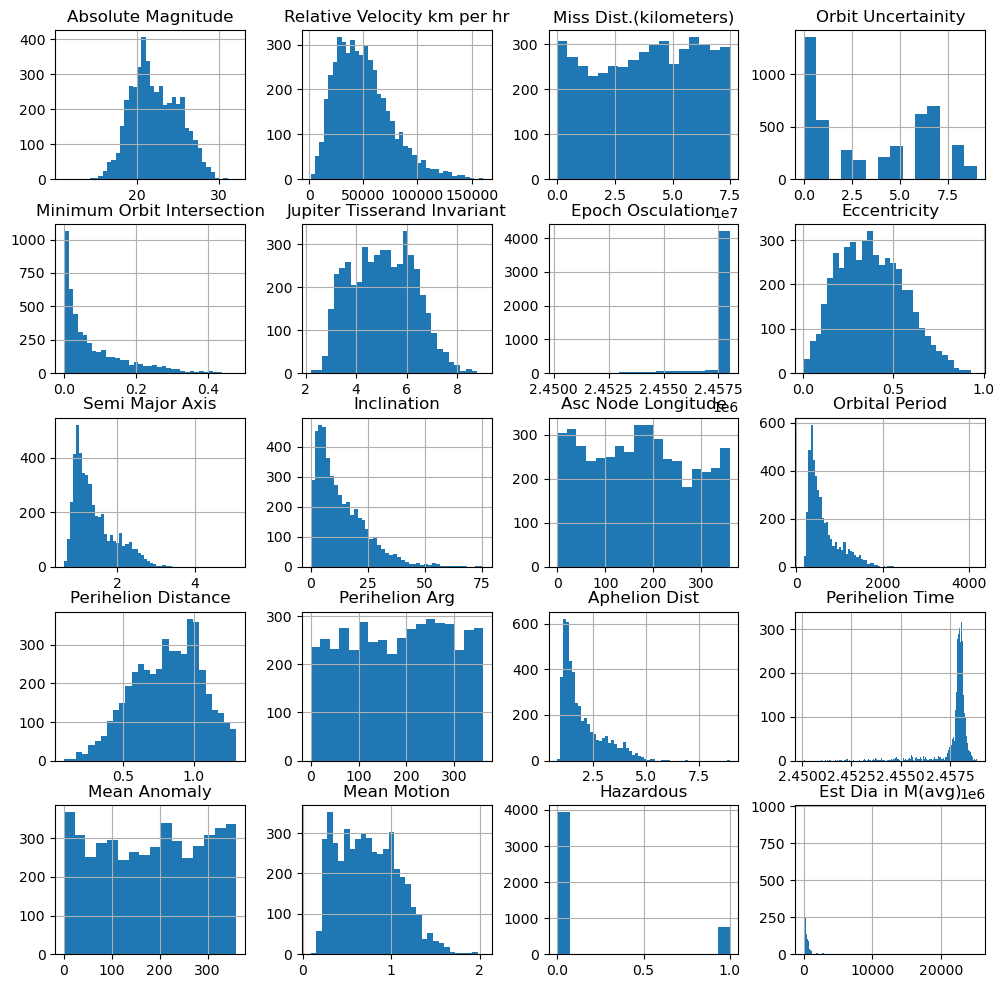

In [99]:
# let's plot the histogram for each feature in our analysis df
analysis_df.hist(bins="auto", figsize=(12,12))

## Analysis

### Descriptive Analysis

#### What is the mean miss distance (in km) of hazardous asteroids vs non-hazardous asteroids?

In [100]:
analysis_df.groupby(by=["Hazardous"])["Miss Dist.(kilometers)"].mean().apply(lambda x: f"{x:,.2f}")

Hazardous
0    38,103,765.98
1    40,026,372.71
Name: Miss Dist.(kilometers), dtype: object

Non-hazardous asteroids have a mean miss distance of 38,103,765.98 km, and hazardous asteroids have a mean miss distance of 40,026,372.71 km.

#### What is the median asteroid diameter (in meters) of hazardous asteroids vs non-hazardous asteroids?

In [101]:
analysis_df.groupby(by=["Hazardous"])["Est Dia in M(avg)"].median()

Hazardous
0    124.034533
1    374.578302
Name: Est Dia in M(avg), dtype: float64

In [102]:
# Remove outliers for presentation visual purposes

# get IQR of asteroid diameter
q1 = analysis_df["Est Dia in M(avg)"].quantile(0.25)
q3 = analysis_df["Est Dia in M(avg)"].quantile(0.75)
iqr = q3 - q1

# define bounds for the outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# exclude outliers from visualization data
dia_vis_data = analysis_df[(analysis_df["Est Dia in M(avg)"] >= lower_bound) &
                          (analysis_df["Est Dia in M(avg)"] <= upper_bound)]

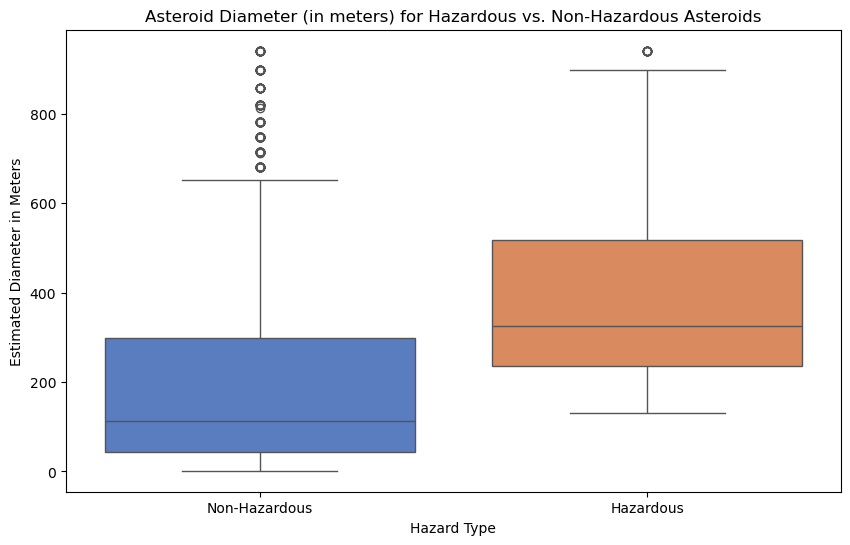

In [103]:
# Presentation Visual:
# Box plot of median asteroid diameter of hazardous and non-hazardous asteroids
# NOTE: we removed outliers from the data to ensure the box plot would be readable

plt.figure(figsize=(10, 6))
sns.boxplot(data=dia_vis_data, x="Hazardous", y="Est Dia in M(avg)", hue="Hazardous", legend=False, palette="muted")
plt.title("Asteroid Diameter (in meters) for Hazardous vs. Non-Hazardous Asteroids")
plt.xlabel("Hazard Type")
plt.ylabel("Estimated Diameter in Meters")
plt.xticks([0, 1], ["Non-Hazardous", "Hazardous"])
plt.show()

Hazardous asteroids, on average, are larger, with an estimated diameter of 374.58 meters. Non-hazardous asteroids, on average, are smaller, with an estimated diameter of 124.03 meters.

#### What were the five earliest and latest Close Approach Dates of hazardous asteroids?

In [104]:
# earliest close approach dates of hazardous asteroids
sorted(analysis_df[analysis_df["Hazardous"] == 1]["Close Approach Date"].unique(), reverse=False)[:5]

['1995-01-01', '1995-01-08', '1995-01-15', '1995-01-22', '1995-02-22']

In [105]:
# latest close approach dates
sorted(analysis_df[analysis_df["Hazardous"] == 1]["Close Approach Date"].unique(), reverse=True)[:5]

['2016-09-08', '2016-08-15', '2016-08-08', '2016-07-15', '2016-07-08']

The earliest close approach dates of hazardous asteroids range from Jan 1, 1995 to Feb 22, 1005, and the latest close approach dates of hazardous asteroids range from July 8, 2016 - September 8, 2016.

#### Do hazardous asteroids have a higher mean relative velocity than non-hazardous ones?

In [106]:
analysis_df.groupby(by=["Hazardous"])["Relative Velocity km per hr"].mean()

Hazardous
0    48086.528016
1    61796.107391
Name: Relative Velocity km per hr, dtype: float64

Hazardous asteroids have a higher mean relative velocity at 61,796 km/hr than non-hazardous asteroids, whose mean relative velocity is 48,086 km/hr.

#### How many asteroids in this dataset are considered hazardous vs non-hazardous?

In [107]:
# Hazardous will be our target value
# Let's check the value counts of this
hazardous_counts = nasa_df["Hazardous"].value_counts()
hazardous_counts

Hazardous
0    3932
1     755
Name: count, dtype: int64

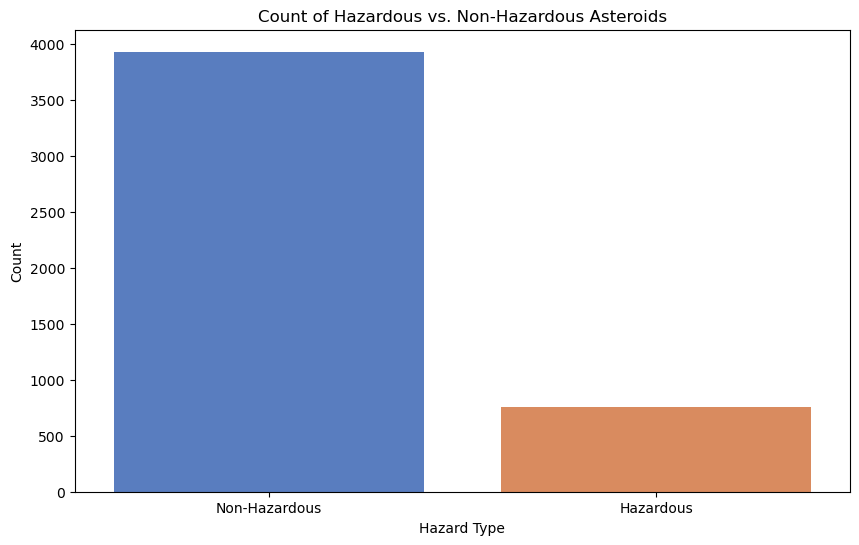

In [108]:
# Presentation Visual:
# Bar chart of data dsitribution between our target feature
plt.figure(figsize=(10, 6))

sns.barplot(x=hazardous_counts.index, y=hazardous_counts.values, hue=hazardous_counts.index, legend=False, palette="muted")
plt.title("Count of Hazardous vs. Non-Hazardous Asteroids")
plt.xlabel("Hazard Type")
plt.ylabel("Count")
plt.xticks([0, 1], ["Non-Hazardous", "Hazardous"])
plt.show()

Looks like we have an imbalanced number of values in our target classes. We will come back to this later.

### Inferential Questions

#### Is there a significant difference between the mean absolute magnitudes of hazardous and non-hazardous asteroids?
- **Null Hypothesis**: There is no significant difference between the mean absolute magnitudes of hazardous and non-hazardous asteroids.
- **Alternative Hypothesis**: There is a significant difference between the mean absolute magnitudes of hazardous and non-hazardous asteroids.

In [109]:
# get the aboslute magnitude data for hazardous and non-hazardous asteroids
abs_mag_hazardous = analysis_df[analysis_df["Hazardous"] == 1]["Absolute Magnitude"]
abs_mag_nonhazardous = analysis_df[analysis_df["Hazardous"] == 0]["Absolute Magnitude"]

In [110]:
# define our alpha
alpha = 0.05

t_stat, p_value = ttest_ind(abs_mag_hazardous, abs_mag_nonhazardous, equal_var=False)
print(f"t_stat: {t_stat}, p_value: {p_value}")
print(f"Should we reject the null hypothesis? {p_value < alpha}")

t_stat: -37.706599271862444, p_value: 1.1896857785722151e-243
Should we reject the null hypothesis? True


Our p-value is less than our alpha of 0.05, so we can reject the null hypothesis and say that there is a significant difference between the mean absolute magnitudes of hazardous and non-hazardous asteroids.

#### Is there a significant difference in relative velocity of hazardous and non-hazardous asteroids?
- **Null Hypothesis**: There is no significant difference between relative velocity of hazardous and non-haardous asteroids.
- **Alternative Hypothesis**: There is a significant difference between relative velocity of hazardous and non-haardous asteroids.

In [111]:
# get the relative velocity data for hazardous and non-hazardous asteroids
rel_vel_hazardous = analysis_df[analysis_df["Hazardous"] == 1]["Relative Velocity km per hr"]
rel_vel_nonhazardous = analysis_df[analysis_df["Hazardous"] == 0]["Relative Velocity km per hr"]

In [112]:
# define our alpha
alpha = 0.05

t_stat, p_value = ttest_ind(rel_vel_hazardous, rel_vel_nonhazardous, equal_var=False)
print(f"t_stat: {t_stat}, p_value: {p_value}")
print(f"Should we reject the null hypothesis? {p_value < alpha}")

t_stat: 12.572500183621427, p_value: 8.812810756584816e-34
Should we reject the null hypothesis? True


/var/folders/8g/m6zcqnnd1p36dhf35mwkv0zw0000gn/T/ipykernel_811/2690884672.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([0, 1], labels=["Hazardous", "Non-Hazardous"])


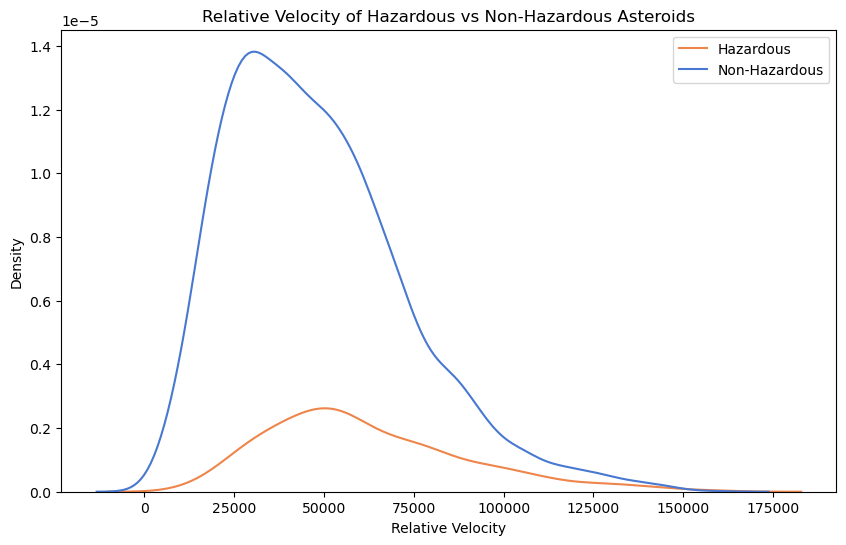

In [113]:
# Presentation Visual:
# KDE of relative velocities of hazardous and non-hazardous asteroids

plt.figure(figsize=(10, 6))

sns.kdeplot(data=analysis_df, x="Relative Velocity km per hr", hue="Hazardous", legend=True, palette='muted')
plt.title("Relative Velocity of Hazardous vs Non-Hazardous Asteroids")
plt.xlabel("Relative Velocity")
plt.legend([0, 1], labels=["Hazardous", "Non-Hazardous"])
plt.show()

Our p-value is less than our alpha of 0.05, so we can reject the null hypothesis and say that there is a significant difference between relative velocity of hazardous and non-haardous asteroids.

#### What is the relationship between different features and an asteroid being hazardous or not?

In [114]:
# use encoder helper function on the text columns in the dataframe
# for easier analysis

helper.encode_strings(analysis_df)
nasa_df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous,Est Dia in M(avg)
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1,205.846088
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0,236.342931
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1,374.578302
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0,14.241070
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1,205.846088


In [115]:
# do an ANOVA test to see if some features are more relevant to
# our target of Hazardous than others

category_cols = list(analysis_df.columns)
category_cols.remove("Hazardous")

target_feature = "Hazardous"

anova_results = {}

for feature in category_cols:
  # Group the features by the target
  groups = [analysis_df[analysis_df[target_feature] == x][feature] for x in analysis_df[target_feature].unique()]
  
  # perform ANOVA test across the groups
  f_stat, p_value = f_oneway(*groups)

  # store the results in a dictionary
  anova_results[feature] = {"f_stat": f_stat, "p_value": p_value}

for feature, result in anova_results.items():
  print(f"Feature: {feature} F-statistic: {result['f_stat']} P-value: {result['p_value']}")

Feature: Absolute Magnitude F-statistic: 555.2842359303269 P-value: 3.9967620740620063e-116
Feature: Close Approach Date F-statistic: 29.394863865755713 P-value: 6.199867119804264e-08
Feature: Relative Velocity km per hr F-statistic: 179.26039933142576 P-value: 3.813069389316555e-40
Feature: Miss Dist.(kilometers) F-statistic: 4.925553466723288 P-value: 0.026510040209261076
Feature: Orbit Determination Date F-statistic: 225.12211500278806 P-value: 9.716767143834109e-50
Feature: Orbit Uncertainity F-statistic: 567.582045510978 P-value: 1.6323395084149385e-118
Feature: Minimum Orbit Intersection F-statistic: 426.7913120670257 P-value: 8.117705759299255e-91
Feature: Jupiter Tisserand Invariant F-statistic: 0.05428471075328834 P-value: 0.8157787314040998
Feature: Epoch Osculation F-statistic: 7.865775068384233 P-value: 0.005058679251859071
Feature: Eccentricity F-statistic: 162.82674294482047 P-value: 1.1066609101464944e-36
Feature: Semi Major Axis F-statistic: 0.5435179086339667 P-value: 

Since we have a lot of features, let's drop those that don't have a significant correlation with our target of `Hazardous` (ie. p-value > alpha).

In [116]:
# define alpha
alpha = 0.05
drop_cols = []

for feature, result in anova_results.items():
    p_value = result['p_value']
    if p_value > alpha:
        print(f"Remove feature {feature} with p-value {result['p_value']}")
        drop_cols += [feature]

Remove feature Jupiter Tisserand Invariant with p-value 0.8157787314040998
Remove feature Semi Major Axis with p-value 0.4610153554775154
Remove feature Inclination with p-value 0.5108323317377941
Remove feature Asc Node Longitude with p-value 0.23000400678196187
Remove feature Orbital Period with p-value 0.44462274995461326
Remove feature Perihelion Arg with p-value 0.7913568578577737
Remove feature Mean Motion with p-value 0.3725510071417024


In [117]:
# dropping columns above
analysis_df = analysis_df.drop(columns=drop_cols)
analysis_df.head()

,Absolute Magnitude,Close Approach Date,Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Perihelion Distance,Aphelion Dist,Perihelion Time,Mean Anomaly,Hazardous,Est Dia in M(avg)
0,21.6,0,22017.003799,62753692.0,534,5,0.025282,2458000.5,0.425549,0.808259,2.005764,2.458162e+06,264.837533,1,205.846088
1,21.3,0,65210.346095,57298148.0,432,3,0.186935,2458000.5,0.351674,0.718200,1.497352,2.457795e+06,173.741112,0,236.342931
2,20.3,1,27326.560182,7622911.5,1910,0,0.043058,2458000.5,0.348248,0.950791,1.966857,2.458120e+06,292.893654,1,374.578302
3,27.4,2,40225.948191,42683616.0,1761,6,0.005512,2458000.5,0.216578,0.983902,1.527904,2.457902e+06,68.741007,0,14.241070
4,21.6,2,35426.991794,61010824.0,1190,1,0.034798,2458000.5,0.210448,0.967687,1.483543,2.457814e+06,135.142133,1,205.846088


#### Correlation Heat Map

<Axes: >

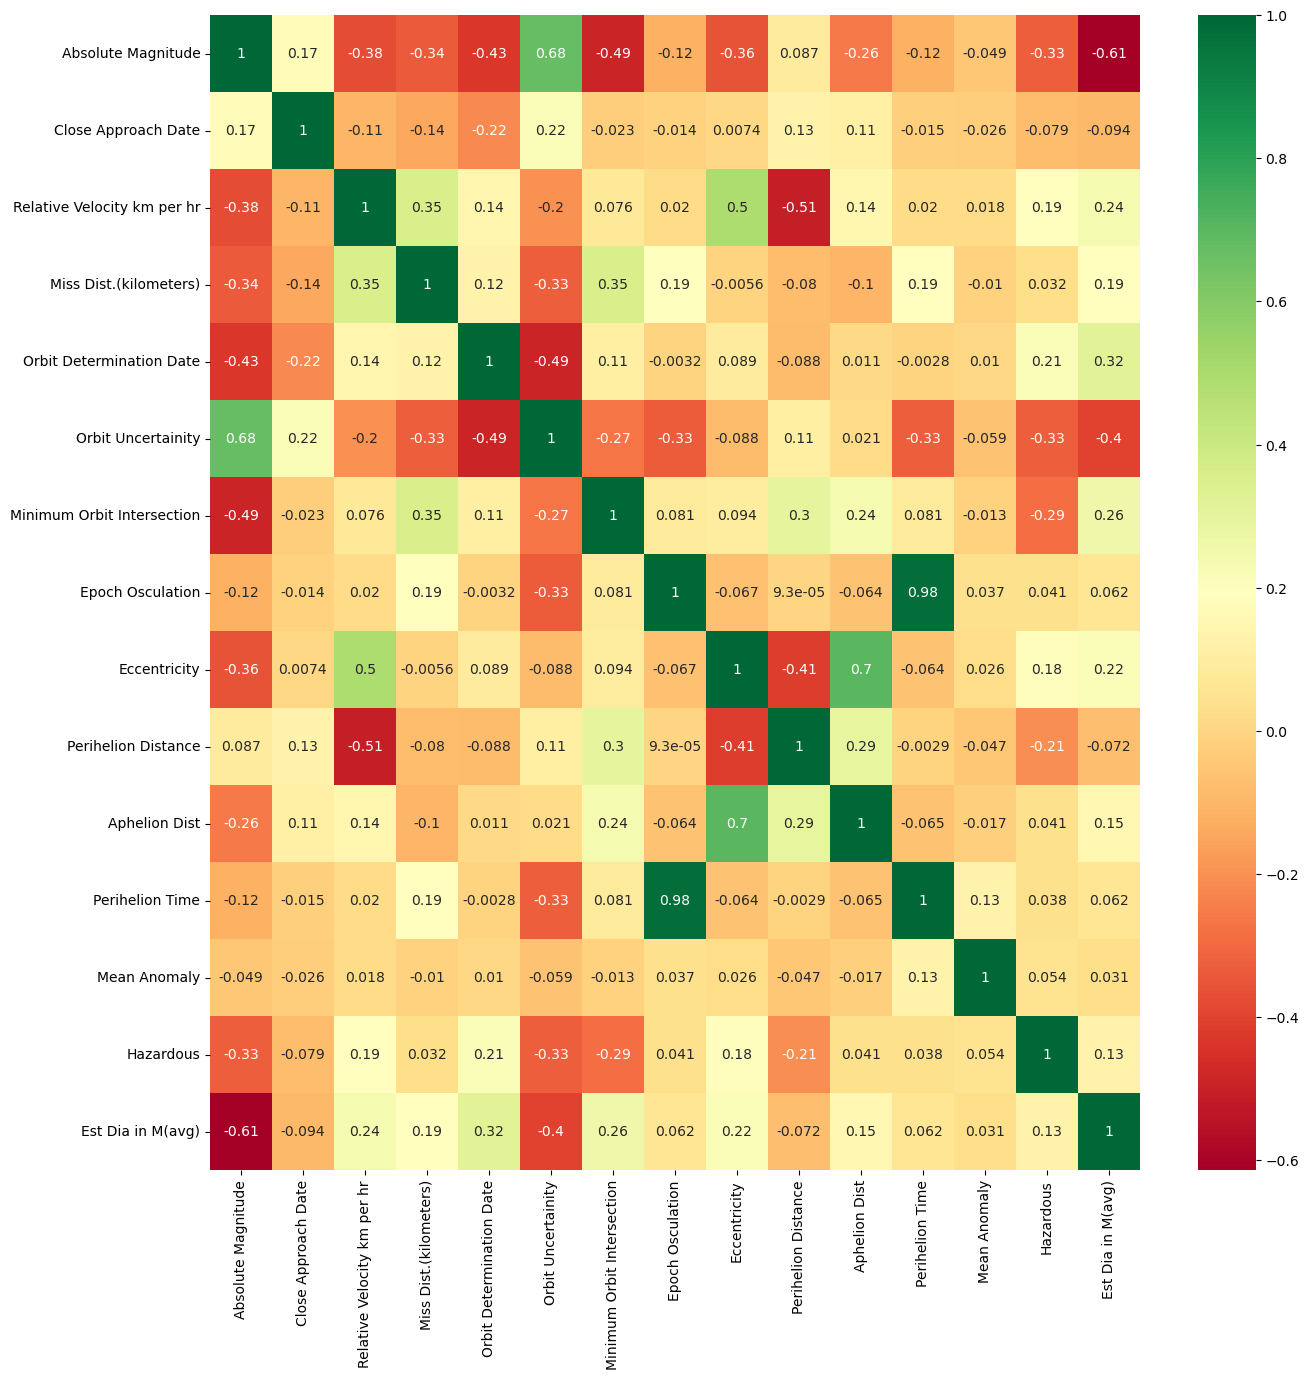

In [118]:
plt.figure(figsize=(15, 15))

sns.heatmap(analysis_df.corr(), annot=True, cmap="RdYlGn")

Perihelion Time vs Epoch Osculation have a correlation of 0.98, which means they are quite similar, and we can maybe drop one of them or feature engineer to combine them somehow. We can play around with this in the next section.

In [119]:
# export analysis_df data as a .csv to use in the next section

analysis_df.to_csv('../data/analysis_data.csv', index=False)

## Summary
- **Initial Analysis**:
  - Dropped several features due to duplication (e.g., keeping only estimated diameter in meters).
  - Descriptive analysis revealed high correlations among many features.
  - Discovered a significant class imbalance with far more non-hazardous than hazardous asteroids.

- **Inferential Analysis**:
  - Rejected the null hypotheses for both inferential questions.
  - ANOVA test helped identify and remove features with low significance, aiming to improve model accuracy.

- **Next Steps**:
  - Perform data preprocessing.
  - Select and train a model (classification, regression, or ensemble) to predict asteroid hazard status.
  - Tune and improve the model based on performance.
  - Address the imbalanced data identified during EDA for better model handling.